In [2]:
# Import Necessary Packages
# ------

import pandas as pd
import numpy as np
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [18]:
# Load the Data
# ------

dataset = "30min"

# read in data
data = pd.read_csv(f'{dataset}_model_data_pi.csv')
labels = ['PM2.5_pi', 'PM10_pi']

# drop rows with Nan values
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:2149,:]

# drop unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# reset keys of dataset
data.reset_index(drop=True, inplace=True)

# only location B
data = data[data['loc'] == 1.0]
data = data.drop('loc', axis=1)

# split into two sets
n = int(0.8*data.shape[0])

# training set: 80% of data
data_train = data.iloc[:n,:]
# test set: 20% of data
data_test = data.iloc[n:,:]

# predictor and response variables for training
y_train_pm25 = data_train[labels[0]]
y_train_pm10 = data_train[labels[1]]
X_train = data_train.drop(labels, axis=1)

# predictor and response variable for testing
y_test_pm25 = data_test[labels[0]]
y_test_pm10 = data_test[labels[1]]
X_test = data_test.drop(labels, axis=1)

In [19]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,PM2.5_pi_t4,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi,hour
538,19.744444,43.611111,3.042222,6.267778,9.618889,6.641667,71.333333,4.800000,9.065833,13.411667,...,6.740000,10.450833,4.816667,78.983333,2.143333,4.403333,6.750833,8.287857,12.921429,12.0
539,6.792857,70.650000,3.865000,8.287857,12.921429,19.744444,43.611111,3.042222,6.267778,9.618889,...,3.617500,5.262500,5.350000,77.241667,3.190000,6.740000,10.450833,9.535000,14.870000,13.0
540,5.833333,69.650000,4.442500,9.535000,14.870000,6.792857,70.650000,3.865000,8.287857,12.921429,...,8.692727,13.842727,5.975000,75.625000,1.982500,3.617500,5.262500,9.234167,14.521667,14.0
541,6.525000,63.441667,4.210000,9.234167,14.521667,5.833333,69.650000,4.442500,9.535000,14.870000,...,9.065833,13.411667,6.372727,72.300000,3.828182,8.692727,13.842727,9.996364,14.314545,15.0
542,6.681818,62.254545,5.662727,9.996364,14.314545,6.525000,63.441667,4.210000,9.234167,14.521667,...,6.267778,9.618889,6.641667,71.333333,4.800000,9.065833,13.411667,10.888333,16.993333,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,19.633333,36.091667,3.625000,9.433333,15.688333,20.070000,36.200000,2.704000,5.797000,9.036000,...,5.820000,9.228000,21.416667,33.466667,2.684167,5.858333,9.194167,4.647273,6.926364,15.0
1070,18.481818,37.609091,2.420909,4.647273,6.926364,19.633333,36.091667,3.625000,9.433333,15.688333,...,6.325833,9.993333,20.520000,34.980000,2.596000,5.820000,9.228000,8.526667,13.664167,16.0
1071,16.550000,50.075000,3.684167,8.526667,13.664167,18.481818,37.609091,2.420909,4.647273,6.926364,...,7.029091,10.828182,20.108333,35.866667,2.847500,6.325833,9.993333,12.902500,20.120833,17.0
1072,14.775000,64.150000,6.013333,12.902500,20.120833,16.550000,50.075000,3.684167,8.526667,13.664167,...,5.797000,9.036000,19.981818,35.990909,3.381818,7.029091,10.828182,6.644167,9.780833,18.0


In [44]:
# Fit the Ridge Regression Model: PM10
# ------

# define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
alphas = arange(167.8,167.9,0.001)

# define model
model_pm10 = RidgeCV(alphas=alphas, cv=cv)

# fit model
model_pm10.fit(X_train, y_train_pm25)

# predict
y_pred_pm10 = model_pm10.predict(X_test)

# report
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
print(f'MSE PM10 = {mse_pm10} with alpha = {model_pm10.alpha_}')


MSE PM10 = 15.80459162384834 with alpha = 167.8420000000002


In [42]:
# Fit the Ridge Regression Model: PM2.5
# ------

# define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
alphas = arange(110.95,111, 1e-3)

# define model
model_pm25 = RidgeCV(alphas=alphas, cv=cv)

# fit model
model_pm25.fit(X_train, y_train_pm25)

# predict
y_pred_pm25 = model_pm25.predict(X_test)

# report
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
print(f'MSE PM2.5 = {mse_pm25} with alpha = {model_pm25.alpha_}')


MSE PM2.5 = 6.544453817066089 with alpha = 110.96600000000008


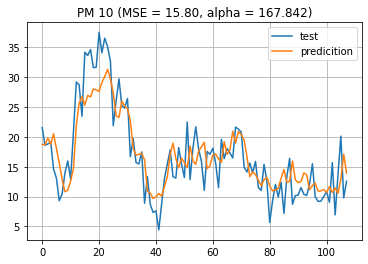

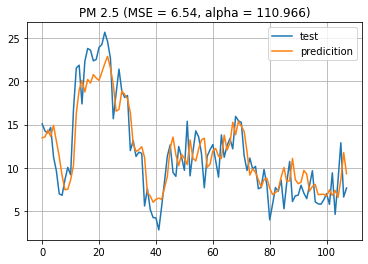

In [52]:
plt.plot(np.arange(len(y_test_pm10)), y_test_pm10, label='test')
plt.plot(np.arange(len(y_pred_pm10)), y_pred_pm10, label='predicition')
plt.title(f'PM 10 (MSE = {format(mse_pm10,".2f")}, alpha = {format(model_pm10.alpha_,".3f")})')
plt.legend()
plt.grid()
plt.show()

plt.plot(np.arange(len(y_test_pm25)), y_test_pm25, label='test')
plt.plot(np.arange(len(y_pred_pm25)), y_pred_pm25, label='predicition')
plt.title(f'PM 2.5 (MSE = {format(mse_pm25,".2f")}, alpha = {format(model_pm25.alpha_,".3f")})')
plt.legend()
plt.grid()
plt.show()